In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xlsxwriter
from shapely.geometry import Point, Polygon
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt

In [2]:

# taken from https://data.humdata.org/dataset/cod-ab-phl
fp = ".\Data\Shapefiles\Philippines\phl_admbnda_adm2_psa_namria_20200529.shp"
map_df = gpd.read_file(fp)
map_df.columns
map_df = map_df[['ADM2_EN', 'geometry']]


In [3]:
# PowerPlants
powerplantsfp = '.\Data\PowerPlants\global_power_plant_database.csv'
powerplants = pd.read_csv(powerplantsfp)
powerplants = powerplants[powerplants.country_long == 'Philippines']
powerplants.capacity_mw = pd.to_numeric(powerplants.capacity_mw, errors='coerce')

crs = {'init':'epsg:4326'}

solar_powerplants = powerplants[powerplants.primary_fuel == 'Solar']
solargeometry=[Point(xy) for xy in zip(solar_powerplants["longitude"], solar_powerplants["latitude"])]
geodata_solar=gpd.GeoDataFrame(solar_powerplants,crs=crs, geometry=solargeometry)

wind_powerplants = powerplants[powerplants.primary_fuel == 'Wind']
windgeometry=[Point(xy) for xy in zip(wind_powerplants["longitude"], wind_powerplants["latitude"])]
geodata_wind=gpd.GeoDataFrame(wind_powerplants,crs=crs, geometry=windgeometry)

C:\Users\rayno\AppData\Local\Temp\ipykernel_26860\3886505064.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  powerplants = pd.read_csv(powerplantsfp)
C:\Program Files\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Program Files\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:title={'center':'Solar Potential'}>

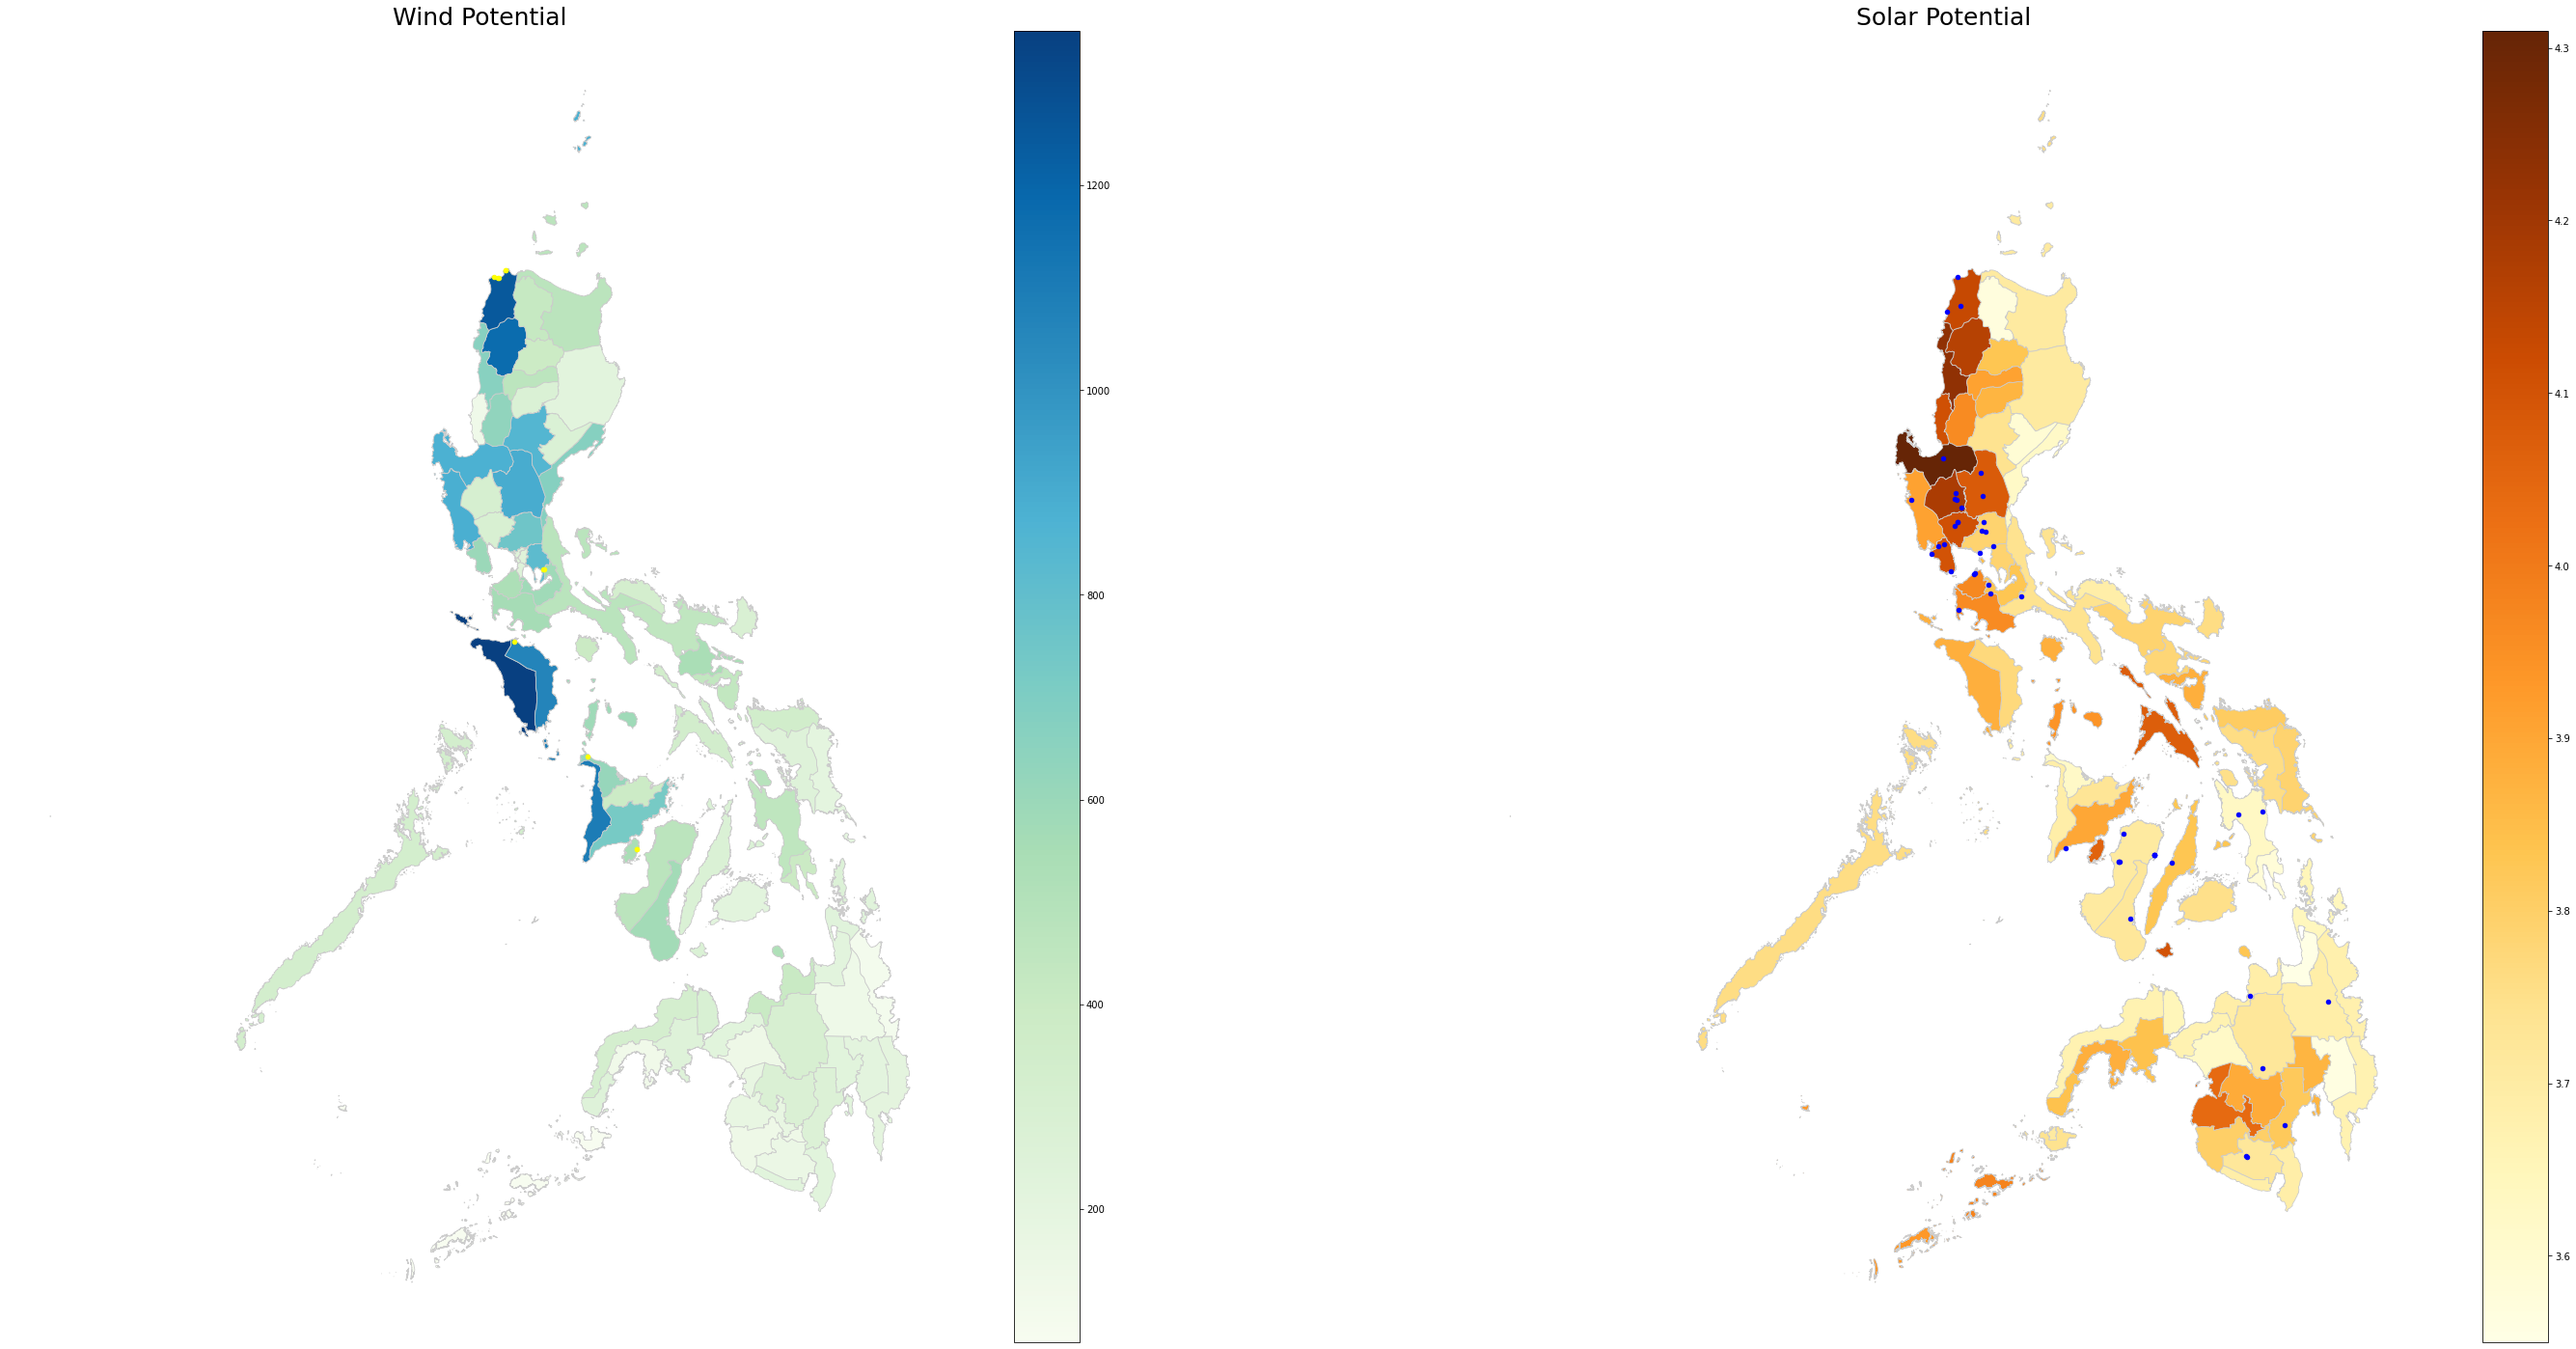

In [4]:
# create figure and axes for Matplotlib
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(50, 25))

# Data for Wind Potential Heatmap
datafp = '.\Data\WindPotential\Philippine_regions_windpotential.csv'
wind_potential_data = gpd.read_file(datafp)
wind_potential_data = wind_potential_data[["ADM2_EN", "mean_power_density"]]
wind_potential_data.mean_power_density = pd.to_numeric(wind_potential_data.mean_power_density, errors='coerce')

merged_wind = map_df.set_index("ADM2_EN").join(wind_potential_data.set_index("ADM2_EN"))
variable_wind = "mean_power_density"

# Data for Solar Potential Heatmap
datafp = '.\Data\SolarPotential\Philippine_regions_pvpotential.csv'
solar_potential_data = gpd.read_file(datafp)
solar_potential_data = solar_potential_data[["ADM2_EN", "avg_specific_pv_output"]]
solar_potential_data.avg_specific_pv_output = pd.to_numeric(solar_potential_data.avg_specific_pv_output, errors='coerce')

merged_solar = map_df.set_index("ADM2_EN").join(solar_potential_data.set_index("ADM2_EN"))
variable_solar = "avg_specific_pv_output"

# Modifying Axes
ax1.axis("off")
ax1.set_title("Wind Potential", fontdict = {"fontsize": "25", "fontweight":"3"})
ax1.tick_params(labelsize=10)
ax1.figure.axes[1].tick_params(labelsize=30)
#ax1.annotate("Source: Global Wind Map, 2022",xy=(0.1, .08), xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=12, color="#555555")

ax2.axis("off")
ax2.set_title("Solar Potential", fontdict = {"fontsize": "25", "fontweight":"3"})
ax1.figure.axes[1].tick_params(labelsize=30)
#ax2.annotate("Source: Global Solar Map, 2022",xy=(0.1, .1), xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=12, color="#555555")


# Plotting
merged_wind.plot(column=variable_wind, cmap="GnBu", linewidth=0.8, ax=ax1, edgecolor="0.8", legend=True)
geodata_wind.plot(ax=ax1, color='yellow', markersize=20)
merged_solar.plot(column=variable_solar, cmap="YlOrBr", linewidth=0.8, ax=ax2, edgecolor="0.8", legend=True)
geodata_solar.plot(ax=ax2, color='blue', markersize=20)
